# Pokemon Dataset and Fuel Economy Dataset Visualization

## Import libraries

In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Loading dataset

###  Loading pokemon dataset

The Pokemon dataset is comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [3]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Loading fuel_economy dataset

The fuel ecomony dataset describes various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [5]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Univariate Exploration

### Bar chart

**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

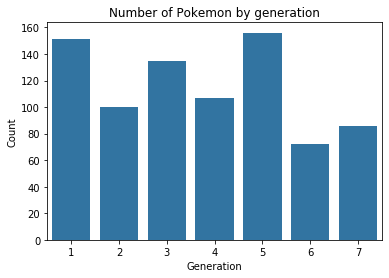

In [6]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)
plt.title('Number of Pokemon by generation')
plt.xlabel('Generation')
plt.ylabel('Count');

Looks like the 1st and 5th generation have a large number of Pokemon. 6th generation has the least number of Pokemon.

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [7]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

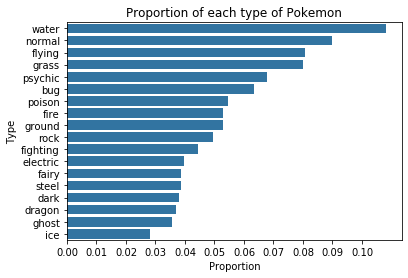

In [10]:
n_points = pkmn_types.shape[0]
max_value = pkmn_types.type.value_counts().max()
max_prop = max_value / n_points
tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:.2f}'.format(x) for x in tick_props]
base_color = sb.color_palette()[0]
type_cat = pkmn_types.type.value_counts().index
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_cat)
plt.xticks(tick_props*n_points, tick_names)
plt.xlabel('Proportion')
plt.ylabel('Type')
plt.title('Proportion of each type of Pokemon');

### Histogram

**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

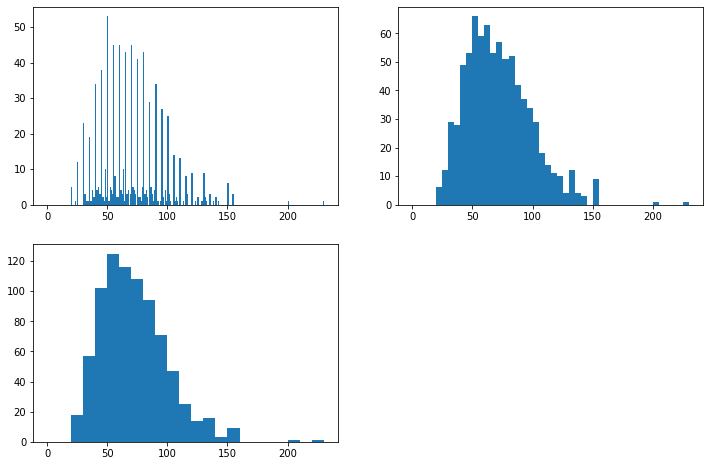

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
max_defense = pokemon['special-defense'].max()
bin_edges = np.arange(0, max_defense+1, 1)
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges);

plt.subplot(2, 2, 2)
bin_edges = np.arange(0, max_defense+1, 5)
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges);

plt.subplot(2, 2, 3)
bin_edges = np.arange(0, max_defense+1, 10)
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges);

Bin width = 5 is a better choice among these three.

### Scales and Transformations

**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

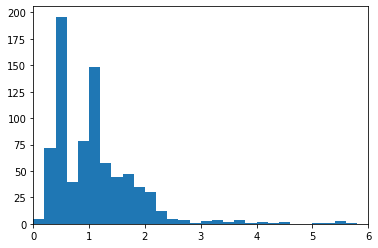

In [13]:
bins = np.arange(0, 6, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim(0, 6);

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

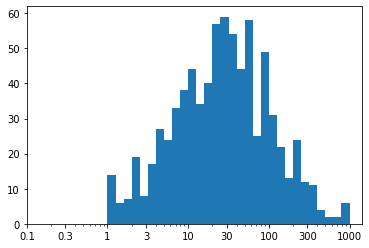

In [14]:
bin_edges = 10 ** np.arange(0, np.log10(pokemon.weight.max())+0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges);
plt.xscale('log');
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000];
plt.xticks(tick_locs, tick_locs);

## Bivariate exploration

### Scatter Plot

**Task**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

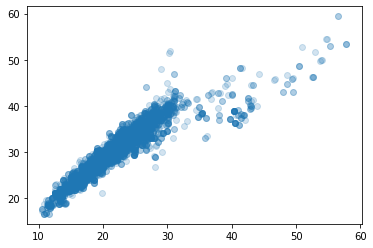

In [8]:
plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 0.2);

### Heat map

**Task**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

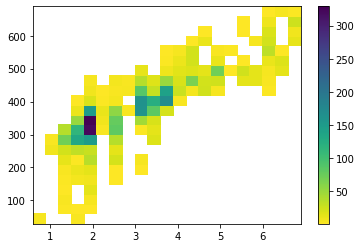

In [11]:
displ_max = fuel_econ.displ.max()
co2_max = fuel_econ.co2.max()
bins_x = np.arange(0.6, 7, 0.3)
bins_y = np.arange(29, 692, 30)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

 ### Box Plot

**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

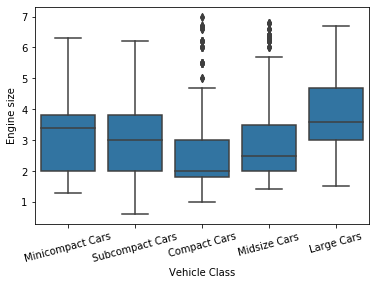

In [16]:
order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', order = order , color=base_color)
plt.xticks(rotation = 15)
plt.xlabel('Vehicle Class')
plt.ylabel('Engine size');

### Violin Plot

**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

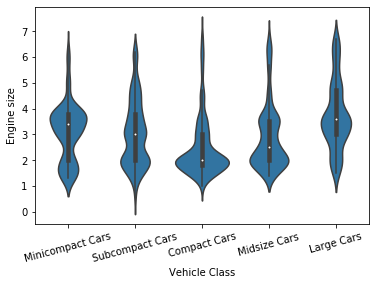

In [19]:
base_color = sb.color_palette()[0]
order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', order = order, color = base_color)
plt.xticks(rotation = 15)
plt.xlabel('Vehicle Class')
plt.ylabel('Engine size');

### Categorical Plot

**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 

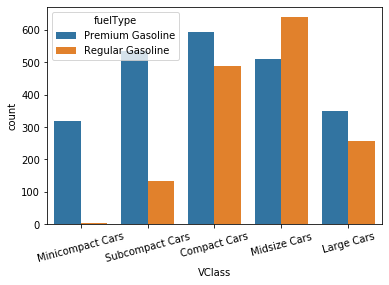

In [20]:
order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType', order = order)
plt.xticks(rotation=15);

### Faceting

**Task**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [21]:
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > 80)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

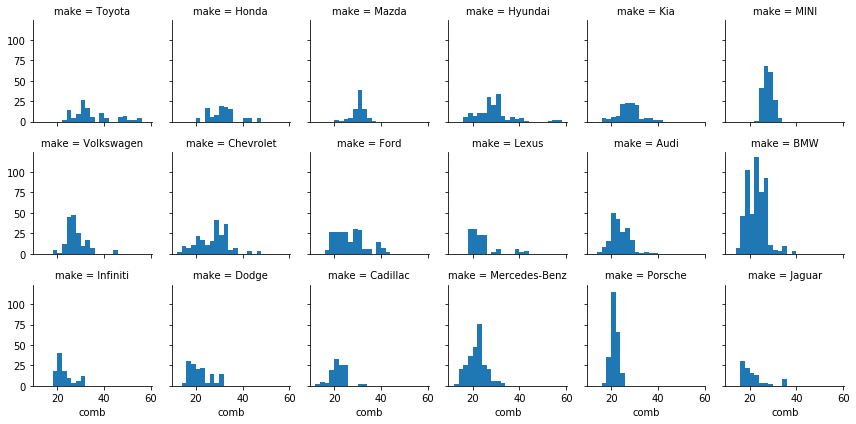

In [24]:
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, col_order = comb_order, height = 2)
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2));

### Adapted Bar chart

**Task**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

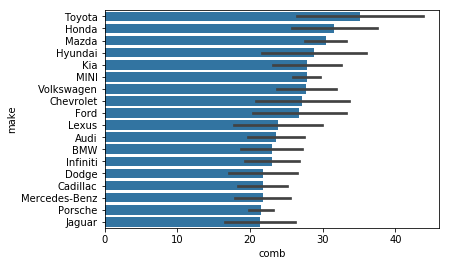

In [21]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
 color = base_color, order = comb_order, ci = 'sd');

## Multivariate exploration

### Encoding

**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

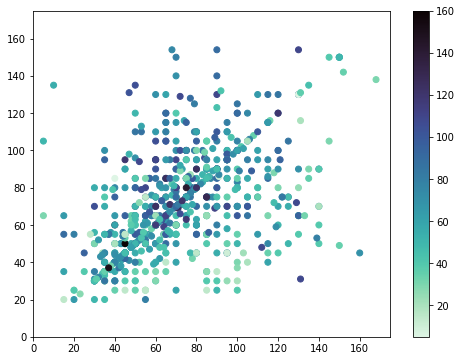

In [30]:
plt.figure(figsize= (8, 6))
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', c = 'speed', cmap = 'mako_r')
plt.colorbar()
plt.xlim(0, 175)
plt.ylim(0, 175);

**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [32]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


In [33]:
mirror = (pkmn_types.type == 'fairy') | (pkmn_types.type == 'dragon')
pokemon_sub = pkmn_types[mirror]
pokemon_sub.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


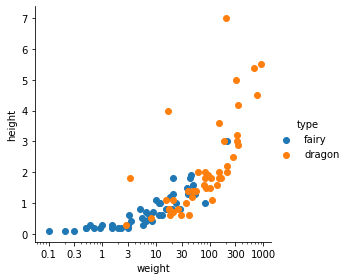

In [34]:
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size= 4)
g.map(plt.scatter, 'weight', 'height')
g.set(xscale='log')
xticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks=xticks, xticklabels=xticks)
g.add_legend();

### Faceting

**Task**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

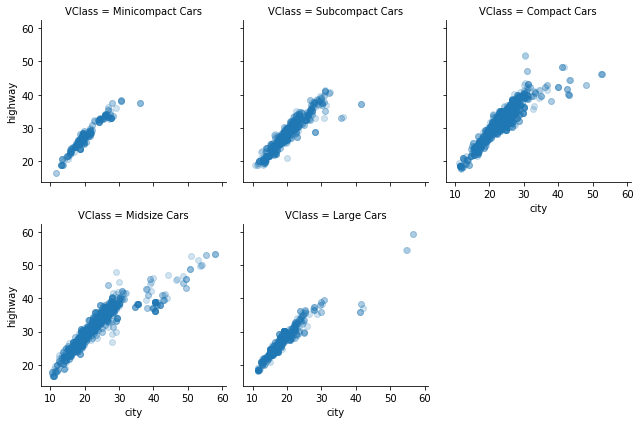

In [37]:
order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
cat_dtype = pd.api.types.CategoricalDtype(
                     categories=order, ordered=True)
fuel_econ['VClass'] = fuel_econ.VClass.astype(cat_dtype)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3)
g.map(plt.scatter, 'city', 'highway', alpha = 0.2);

### Clustered Box Plot

**Task 2**: Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [18]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [38]:
fuel_econ_sub = fuel_econ[fuel_econ.fuelType.isin(['Premium Gasoline', 'Regular Gasoline'])]
fuel_econ_sub.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


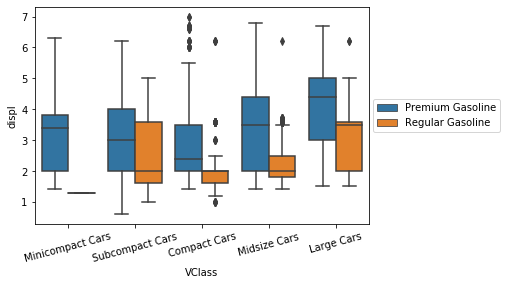

In [40]:
ax = sb.boxplot(data = fuel_econ_sub, x='VClass', y='displ', hue = 'fuelType')
plt.xticks(rotation=15)
plt.legend(loc=10, bbox_to_anchor = (1.2, 0.5));

### Plot Matrix

**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

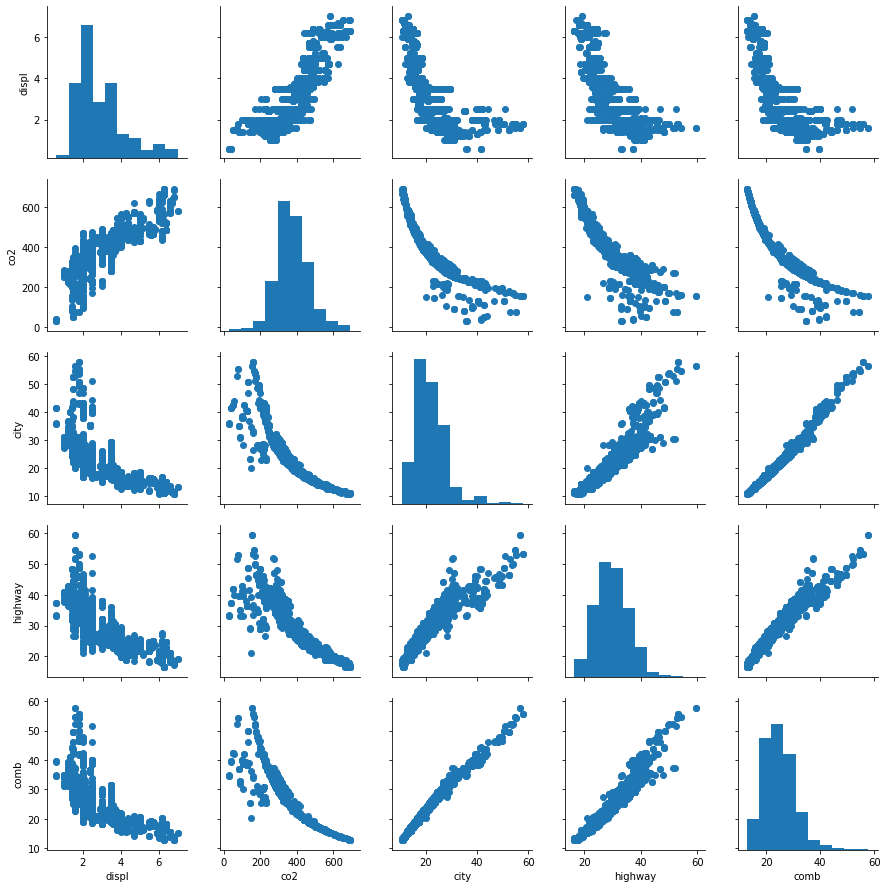

In [43]:
# YOUR CODE HERE
vars = ['displ', 'co2', 'city', 'highway', 'comb']
g = sb.PairGrid(data = fuel_econ, vars = vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### Feature engineer

**Task**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [12]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

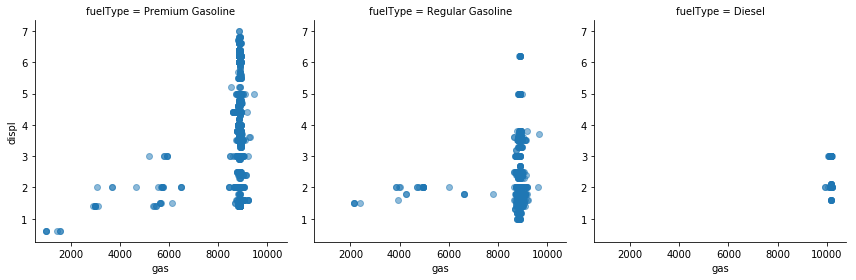

In [16]:
fuel_econ['gas'] = fuel_econ['co2'] * fuel_econ['comb']
ftypes = ['Premium Gasoline', 'Regular Gasoline', 'Diesel']
fuel_econ_sub = fuel_econ[fuel_econ.fuelType.isin(ftypes)]
g = sb.FacetGrid(data = fuel_econ_sub, col = 'fuelType', size = 4)
g.map(plt.scatter, 'gas', 'displ', alpha = 0.5);